# Actividad 2: Validación y evaluación en regresión y clasificación

**Elaborado por: Carlos Esteban Posada**  
**Fecha: Enero 2021**

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* 60% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

Información útil:
* Para crear celdas en el notebook, usa el botón "+" del menú situado en la esquina superior izquierda.
* Para ejecutar una celda (texto o código), pulsa el botón "Run" del menú situado en la esquina superior izquierda.
* Recuerda cambiar el tipo de celda de forma adecuada con el menú superior.
* Más información sobre notebooks en la documentación oficial: https://jupyter.readthedocs.io/en/latest/

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error MAE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 50%-50% hasta un 95%-5%, de 5% en 5%) para un dataset de regresión (el que se desee).

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Carga de los datos
boston_dict = datasets.load_boston()

# creación de las matrices X e y
X = boston_dict["data"]
y = boston_dict["target"]

In [3]:
# generación de los resultados por training_size
train_sizes = np.arange(50, 100, 5)/100
maes_test = [] # vector to save the MAE scores
maes_train = []

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    # separación de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts), random_state=23)
    print(f"con un train_size de {'{:.2f}'.format(ts)} se tienen {(X_train.shape[0])} datos de entrenamiento")
    
    # Entrenamiento y predicción del test
    dr = DummyRegressor()
    dr.fit(X_train, y_train)
    y_train_pred = dr.predict(X_train)
    y_test_pred = dr.predict(X_test)
          
    # evaluacion
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE en train: {mae_train}")
    print(f"MAE en test: {mae_test}")
          
    # guardado de resultados
    maes_train.append(mae_train)
    maes_test.append(mae_test)
    print()

training size: 0.50
con un train_size de 0.50 se tienen 253 datos de entrenamiento
MAE en train: 7.001746629380245
MAE en test: 6.392063616053993

training size: 0.55
con un train_size de 0.55 se tienen 278 datos de entrenamiento
MAE en train: 6.812623570208582
MAE en test: 6.4425722579830875

training size: 0.60
con un train_size de 0.60 se tienen 303 datos de entrenamiento
MAE en train: 6.906556002134866
MAE en test: 6.342811621063584

training size: 0.65
con un train_size de 0.65 se tienen 328 datos de entrenamiento
MAE en train: 6.774520374776918
MAE en test: 6.504727322554124

training size: 0.70
con un train_size de 0.70 se tienen 354 datos de entrenamiento
MAE en train: 6.653634013214595
MAE en test: 6.650044603033007

training size: 0.75
con un train_size de 0.75 se tienen 379 datos de entrenamiento
MAE en train: 6.714433901184203
MAE en test: 6.477422973843308

training size: 0.80
con un train_size de 0.80 se tienen 404 datos de entrenamiento
MAE en train: 6.641152828154103
MA

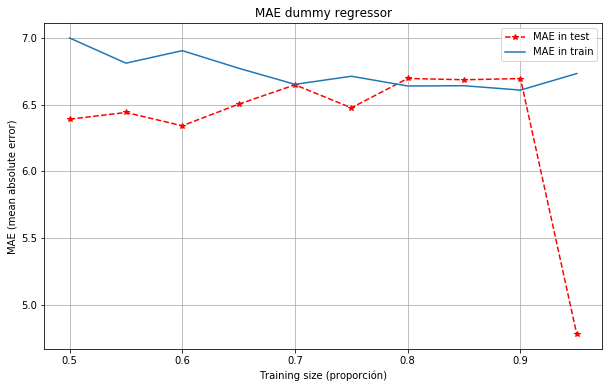

In [4]:
# Gráfica del mae en función del tamaño train-test 
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, maes_test,"*--r", label="MAE in test")
plt.plot(train_sizes, maes_train, label="MAE in train")
plt.title("MAE dummy regressor")
plt.ylabel("MAE (mean absolute error)")
plt.xlabel("Training size (proporción)")
plt.legend()
plt.grid()
plt.show()

**NOTA**: cabe aclarar que no se puede concluir ninguna relación de la gráfica de arriba.
Hay mucha sensibilidad a los elementos que queden dentro de cada test set, por lo cuál no se puede concluir que haya relación con tan solo mirar una selección de test set (para cada test_size)

Para entender si hay una relación, haremos el mismo ejercicio, solamente que para cada test_size, no realizaremos **una** sino **100** particiones. 
Es decir, para la partición 50%, crearé 100 test sets y luego miraré los estadísticos de esto. 
Para la partición 55%, crearé 100 tests distintos y de nuevo, miramos los estadísticos

In [5]:
num_simul = 100
train_sizes = np.arange(50, 100, 5)/100
maes_test = [] # vector to save the MAE scores
maes_train = []
resultados = {}

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    train_results = []
    test_results = []
    for i in range(num_simul):
        # separación de los datos
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts)) # sin random_state

        # Entrenamiento y predicción del test
        dr = DummyRegressor()
        dr.fit(X_train, y_train)
        y_train_pred = dr.predict(X_train)
        y_test_pred = dr.predict(X_test)

        # evaluacion
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        # guardado de resultados
        
        train_results.append(mae_train)
        test_results.append(mae_test)
    resultados[ts] = {
        "train": train_results,
        "test":test_results
    }

training size: 0.50
training size: 0.55
training size: 0.60
training size: 0.65
training size: 0.70
training size: 0.75
training size: 0.80
training size: 0.85
training size: 0.90
training size: 0.95


In [6]:
# Captura de los estaísticos
medias = []
desvests = []
for ts in train_sizes:
    media = np.mean(resultados[ts]["test"])
    desvest = np.std(resultados[ts]["test"])
    medias.append(media)
    desvests.append(desvest)
    
medias = np.array(medias)
desvests = np.array(desvests)

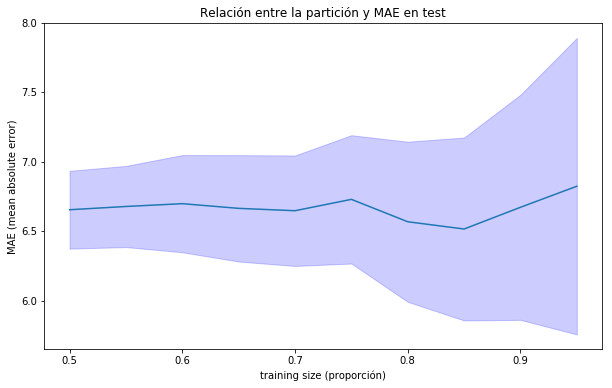

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, medias)
plt.fill_between(train_sizes, medias-desvests, medias+desvests,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.title("Relación entre la partición y MAE en test")
plt.xlabel("training size (proporción)")
plt.ylabel("MAE (mean absolute error)")
plt.show()

ahora se puede apreciar que en realidad el estimador no mejora ni empeora con % de partición distintos. 
Lo que sí se puede apreciar es que mientras más grande es el train size (más pequeño el test size) es más volátil el MAE, es decir, el error podría oscilar en un rango más alto (pero con la misma media)

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de exactitud, en lugar de MAE).

In [8]:
# carga de datos
iris_dict = datasets.load_iris()

# creación de las matrices X e y
X = iris_dict.data
y = iris_dict.target

In [9]:
# generación de los resultados por training_size
train_sizes = np.arange(50, 100, 5)/100
accs_test = [] # vector to save the MAE scores
accs_train = []

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    # separación de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts), random_state=23)
    print(f"con un train_size de {'{:.2f}'.format(ts)} se tienen {(X_train.shape[0])} datos de entrenamiento")
    
    # Entrenamiento y predicción del test
    clf = DummyClassifier()
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
          
    # evaluacion
    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
          
    # guardado de resultados
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    print()

training size: 0.50
con un train_size de 0.50 se tienen 75 datos de entrenamiento

training size: 0.55
con un train_size de 0.55 se tienen 82 datos de entrenamiento

training size: 0.60
con un train_size de 0.60 se tienen 90 datos de entrenamiento

training size: 0.65
con un train_size de 0.65 se tienen 97 datos de entrenamiento

training size: 0.70
con un train_size de 0.70 se tienen 104 datos de entrenamiento

training size: 0.75
con un train_size de 0.75 se tienen 112 datos de entrenamiento

training size: 0.80
con un train_size de 0.80 se tienen 120 datos de entrenamiento

training size: 0.85
con un train_size de 0.85 se tienen 127 datos de entrenamiento

training size: 0.90
con un train_size de 0.90 se tienen 135 datos de entrenamiento

training size: 0.95
con un train_size de 0.95 se tienen 142 datos de entrenamiento



C:\Users\user\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


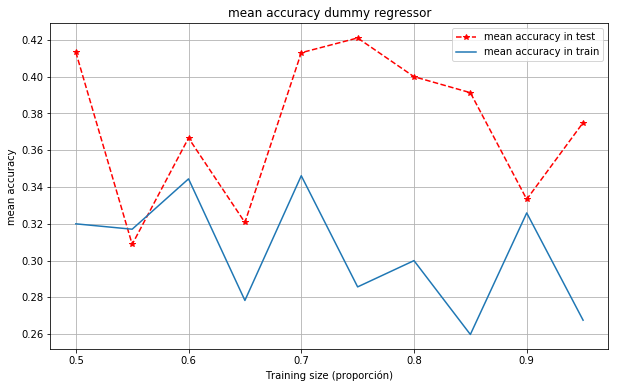

In [10]:
# Gráfica del mean accuracy en función del tamaño train-test 
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accs_test,"*--r", label="mean accuracy in test")
plt.plot(train_sizes, accs_train, label="mean accuracy in train")
plt.title("mean accuracy dummy regressor")
plt.ylabel("mean accuracy")
plt.xlabel("Training size (proporción)")
plt.legend()
plt.grid()
plt.show()

Al igual que hicimos en el punto 1, mejor vamos a dibujar la relación entre el split y el accuracy, pero teniendo en cuenta 100 splits distintos para cada test_size

In [11]:
num_simul = 100
train_sizes = np.arange(50, 100, 5)/100
accs_test = [] # vector to save the MAE scores
accs_train = []
resultados = {}

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    train_results = []
    test_results = []
    for i in range(num_simul):
        # separación de los datos
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts)) # sin random_state

        # Entrenamiento y predicción del test
        clf = DummyClassifier()
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # evaluacion
        acc_train = clf.score(X_train, y_train)
        acc_test = clf.score(X_test, y_test)
        
        # guardado de resultados
        train_results.append(acc_train)
        test_results.append(acc_test)
        
    resultados[ts] = {
        "train": train_results,
        "test":test_results
    }

training size: 0.50
training size: 0.55
training size: 0.60
training size: 0.65
training size: 0.70
training size: 0.75
training size: 0.80
training size: 0.85
training size: 0.90
training size: 0.95


In [12]:
# Captura de los estaísticos
medias = []
desvests = []
for ts in train_sizes:
    media = np.mean(resultados[ts]["test"])
    desvest = np.std(resultados[ts]["test"])
    medias.append(media)
    desvests.append(desvest)
    
medias = np.array(medias)
desvests = np.array(desvests)

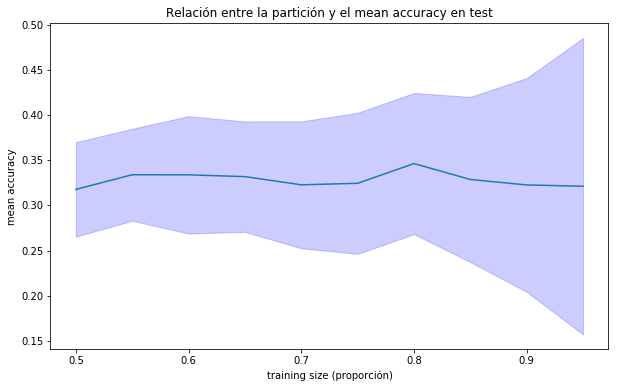

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, medias)
plt.fill_between(train_sizes, medias-desvests, medias+desvests,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.title("Relación entre la partición y el mean accuracy en test")
plt.xlabel("training size (proporción)")
plt.ylabel("mean accuracy")
plt.show()

De nuevo parece no haber relación entre el test_size y el mean accuracy. En este caso, el mean accuracy permanece con una media de al rededor de 0.33 y la desviación sí crece a medida que el training size se hace más grande

### Ejercicio 3 (2 puntos)

Cree un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE usando los regresores OLS y KNN en validación cruzada con 10 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

#### import de bibliotecas necesarias y carga de datos

In [14]:
from sklearn.datasets.california_housing import fetch_california_housing 
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from math import sqrt
import seaborn as sns

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
# carga de los datasets
dict_boston = datasets.load_boston()
dict_dbts = datasets.load_diabetes()
dict_calif = fetch_california_housing()

# diccionario con todos los datasets que se necesitan
dict_datos = {
    "boston": dict_boston,
    "diabetes": dict_dbts,
    "california": dict_calif
}

#### Estandarización de los datos
En esta sección se realizará el cálculo de las matrices de data estandarizados para todos los datasets

In [16]:
# Estandarizar los datos
# Para cada diccionario de datos se agregará otra llave conteniendo la data estandarizada
for name, diccionario in dict_datos.items():
#     print(name)
#     print(diccionario)
#     print(diccionario.data)
    est = StandardScaler()
    data_preprocesada = est.fit_transform(diccionario.data)
    # guardo la data preprocesada en el diccionario original
    diccionario["data_prep"] = data_preprocesada

#### Métricas y algoritmos
Creación de diccionarios con métricas y algoritmos para ser usados en los posteriores experimentos

In [17]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
#   'R2': metrics.r2_score
}

In [18]:
algoritmos = {
    "ols": linear_model.LinearRegression(),
    "knn": KNeighborsRegressor(n_neighbors = 10)
}

#### Ejecución de los experimentos
Se entrenarán modelos por cada dataset y algoritmo. Y se computarán todas las métricas presentes en el diccionario "metricas"

In [19]:
# Ejecución de los distintos algoritmos para cada dataset
results_df = pd.DataFrame(columns=["dataset", "algorithm", "MAE", "RMSE", "MAPE"]) # dataframe para guardar los resultados
seed = 42 # semilla que se usará en todas las iteraciones
for data_name, datos in dict_datos.items():
    for alg_name, alg in algoritmos.items():
        print("ejecutando:", data_name, " - ",alg_name)
        
        # selección de los datos y el modelo
        # Validación y obtención de las predicciones del modelo.
        y_pred = cross_val_predict(alg, datos["data_prep"], datos["target"],
                   cv = KFold(n_splits=10, random_state=seed))
        
        # computando métricas
        MAE = metricas['MAE'](datos.target, y_pred)
        RMSE = metricas['RMSE'](datos.target, y_pred)
        MAPE = metricas['MAPE'](datos.target, y_pred)
        
        # guardar los resultados en el dataframe correspondiente
        resultados_actuales = {
            "dataset":data_name,
            "algorithm":alg_name,
            "MAE": MAE, 
            "RMSE":RMSE,
            "MAPE":MAPE
        }
        results_df = results_df.append(resultados_actuales, ignore_index=True)
        

ejecutando: boston  -  ols
ejecutando: boston  -  knn
ejecutando: diabetes  -  ols
ejecutando: diabetes  -  knn
ejecutando: california  -  ols
ejecutando: california  -  knn


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. 

In [20]:
results_df

,dataset,algorithm,MAE,RMSE,MAPE
0,boston,ols,3.997306,5.877045,21.201154
1,boston,knn,3.687806,5.401275,18.217294
2,diabetes,ols,44.214396,54.763421,39.465002
3,diabetes,knn,46.331674,58.470362,40.614624
4,california,ols,0.544521,0.742262,32.534784
5,california,knn,0.523631,0.738628,29.378302


#### Preparación de datos para análisis
Se dará un formato adecuado a los resultados de los experimentos anteriores para realizar gráficas

In [21]:
# preparación de los datos para hacer gráficas comparativas
melted_results = results_df.melt(id_vars=["dataset", "algorithm"], 
        var_name="metric", 
        value_name="Value")
# melted_results

#### Gráficas comparativas

boston


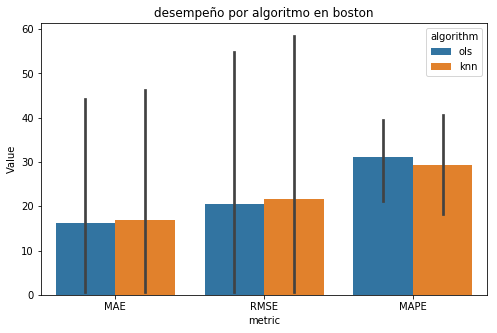

diabetes


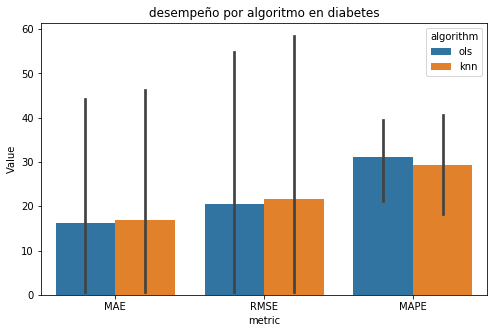

california


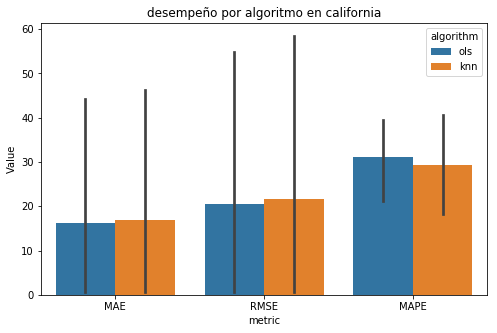

In [22]:
# gráficas comparativas
for data_name in dict_datos:
    print(data_name)
    df = melted_results[melted_results["dataset"]== data_name]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x="metric", y="Value", hue="algorithm", data= melted_results)
    plt.title("desempeño por algoritmo en "+data_name)
    plt.show()

Cabe recordar que las gráficas anteriores fueron obtenidas con OLS y KNN de 10 vecinos y la data fue estandarizada previo al entrenamiento y evaluación de los modelos.

Se puede observar que en los 3 datasets la dinámica es la misma, reflejando:
* El algoritmo OLS presenta un MAE y RMSE ligeramente mejores que KNN, sin embargo
* El algoritmo KNN con 10 vecinos siempre mostró un mejor desempeño en MAPE que OLS

### Ejercicio 4 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos; b) función de distancia; c) con/sin normalización previa de atributos. Para ello, pruebe al menos dos configuraciones distintas de cada aspecto. Use tres datasets diferentes en validación leave-one-out en la comparativa de resultados.

#### Ajuste del tamaño de datos para experimentar

Dado que estamos trabajando con la data de california y esta es muy grande (20640 registros) haremos un corte para tener menos registros y así poder realizar diversos experimentos con los hiperparámetros planteados.

In [23]:
rows_california = 2000 # tomaremos una parte de los datos
dict_calif.data = dict_calif.data[:rows_california]
dict_calif.target = dict_calif.target[:rows_california]
dict_calif["data_prep"] = dict_calif["data_prep"][:rows_california]

In [24]:
dict_datos["california"].data.shape # se verifica que el diccionario con los datos no tiene las 20.000 filas

(2000, 8)

#### Ejecutar experimentos

In [25]:
# Variables para experimentar
ks = [2, 5, 10, 20] # lista de número de vecinos
distancias = [1, 2, 3]#[1, 2, 3, 4, 5] # valores para p
data2use = ["data", "data_prep"] # data orginal y data estandarizada

In [26]:
# la siguiente celda corre los experimentos. Esta puede tomar varios minutos en ejecutar

In [27]:
results_df = pd.DataFrame(columns=["dataset", "num_vecinos", "metrica_distancia", "preprocesamiento","MAE", "RMSE", "MAPE"]) # dataframe para guardar los resultados
seed = 42 # semilla que se usará en todas las iteraciones
cont_experimento = 0 # contador auxiliar para imprimir el número de experimento
total_experimentos = len(dict_datos)*len(ks)*len(distancias)*len(data2use)

for data_name, datos in dict_datos.items():
    for k in ks:
        for distance in distancias:
            for data_key in data2use:
                
                # Se imprime por consola la información de la iteración-experimento
                cont_experimento+=1
                print()
                print()
                print(f"experimento {cont_experimento}/{total_experimentos}")
                print(f"computando {data_name}, k={k}, distancia={distance}, tipo_datos={data_key}")
                
                # Inicialización del algorimto de aprendizaje
                alg = KNeighborsRegressor(n_neighbors = k, p = distance)
                
                # Seleccion de los datos de entrenamiento
                features = datos[data_key]
                num_features = features.shape[0] # para hacer leave_one_out
                
                # Obtención de las predicciones
                y_pred = cross_val_predict(alg, features, datos["target"],
                   cv = KFold(n_splits=num_features, random_state=seed))
                
                # computando métricas
                MAE = metricas['MAE'](datos.target, y_pred)
                RMSE = metricas['RMSE'](datos.target, y_pred)
                MAPE = metricas['MAPE'](datos.target, y_pred)
                
                # guardar los resultados en el dataframe correspondiente
                resultados_actuales = {
                    "dataset":data_name,
                    "num_vecinos": k,
                    "metrica_distancia": distance,
                    "preprocesamiento": data_key,
                    "MAE": MAE, 
                    "RMSE":RMSE,
                    "MAPE":MAPE
                }
                results_df = results_df.append(resultados_actuales, ignore_index=True)



experimento 1/72
computando boston, k=2, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 2/72
computando boston, k=2, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 3/72
computando boston, k=2, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 4/72
computando boston, k=2, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 5/72
computando boston, k=2, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 6/72
computando boston, k=2, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 7/72
computando boston, k=5, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 8/72
computando boston, k=5, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 9/72
computando boston, k=5, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 10/72
computando boston, k=5, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 11/72
computando boston, k=5, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 12/72
computando boston, k=5, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 13/72
computando boston, k=10, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 14/72
computando boston, k=10, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 15/72
computando boston, k=10, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 16/72
computando boston, k=10, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 17/72
computando boston, k=10, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 18/72
computando boston, k=10, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 19/72
computando boston, k=20, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 20/72
computando boston, k=20, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 21/72
computando boston, k=20, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 22/72
computando boston, k=20, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 23/72
computando boston, k=20, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 24/72
computando boston, k=20, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 25/72
computando diabetes, k=2, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 26/72
computando diabetes, k=2, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 27/72
computando diabetes, k=2, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 28/72
computando diabetes, k=2, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 29/72
computando diabetes, k=2, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 30/72
computando diabetes, k=2, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 31/72
computando diabetes, k=5, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 32/72
computando diabetes, k=5, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 33/72
computando diabetes, k=5, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 34/72
computando diabetes, k=5, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 35/72
computando diabetes, k=5, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 36/72
computando diabetes, k=5, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 37/72
computando diabetes, k=10, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 38/72
computando diabetes, k=10, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 39/72
computando diabetes, k=10, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 40/72
computando diabetes, k=10, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 41/72
computando diabetes, k=10, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 42/72
computando diabetes, k=10, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 43/72
computando diabetes, k=20, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 44/72
computando diabetes, k=20, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 45/72
computando diabetes, k=20, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 46/72
computando diabetes, k=20, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 47/72
computando diabetes, k=20, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 48/72
computando diabetes, k=20, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 49/72
computando california, k=2, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 50/72
computando california, k=2, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 51/72
computando california, k=2, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 52/72
computando california, k=2, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 53/72
computando california, k=2, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 54/72
computando california, k=2, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 55/72
computando california, k=5, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 56/72
computando california, k=5, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 57/72
computando california, k=5, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 58/72
computando california, k=5, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 59/72
computando california, k=5, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 60/72
computando california, k=5, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 61/72
computando california, k=10, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 62/72
computando california, k=10, distancia=1, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 63/72
computando california, k=10, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 64/72
computando california, k=10, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 65/72
computando california, k=10, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 66/72
computando california, k=10, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 67/72
computando california, k=20, distancia=1, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 68/72
computando california, k=20, distancia=1, tipo_datos=data_prep


experimento 69/72
computando california, k=20, distancia=2, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 70/72
computando california, k=20, distancia=2, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 71/72
computando california, k=20, distancia=3, tipo_datos=data


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning




experimento 72/72
computando california, k=20, distancia=3, tipo_datos=data_prep


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [28]:
results_df.head()

,dataset,num_vecinos,metrica_distancia,preprocesamiento,MAE,RMSE,MAPE
0,boston,2,1,data,3.812253,5.612233,17.981953
1,boston,2,1,data_prep,2.643577,4.081320,12.699115
2,boston,2,2,data,4.317391,6.362883,20.098461
3,boston,2,2,data_prep,2.589723,4.169221,12.549181
4,boston,2,3,data,4.520059,6.576114,21.200404


#### Comparación de resultados según el preprocesamiento

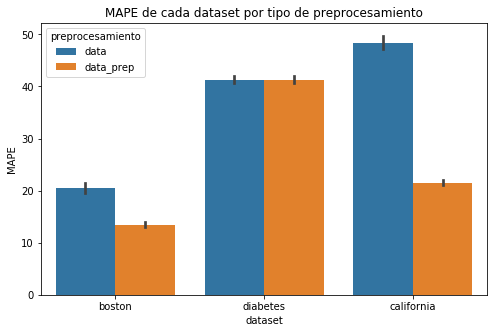

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(hue="preprocesamiento", y="MAPE", x="dataset", data= results_df)
plt.title("MAPE de cada dataset por tipo de preprocesamiento")
plt.show()

Se graficó el MAPE pues es una métrica relativa y permitirá visualizar los 3 datasets al mismo tiempo sin afectar la escala. 

De la gráfica anterior se puede concluir:
* 1. Al parecer el dataset Boston es el problema más fácil de estimar entre los 3 planeados. Caber recordar que el dataset california fue modificado para poder ejecutar una buena cantidad de experimentos
* 2. En todos los casos el error de los datos preprocesados fue menor o igual al error de los datos sin estandarización. Por lo tanto se recomienda siempre hacer la estandarización (o normalización) pues está en el peor de los casos simplemente no mejora la métrica de la data original


#### Análisis del impacto del número de vecinos

De acá en adelante se trabajará con los resultados de los modelos entrenados con datos estandarizados (por los hallazgos del apartado anterior)

En esta sección estudiaremos qué relación hay entre los errores y el número de vecinos

In [40]:
data_experim = results_df[results_df["preprocesamiento"]=="data_prep"]
# data_experim

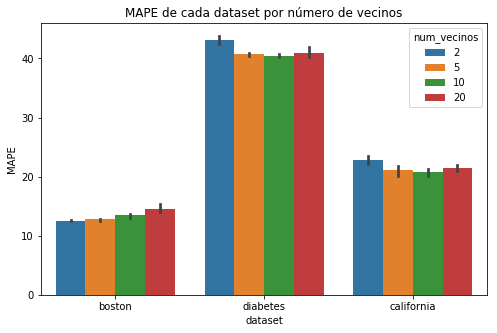

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(hue="num_vecinos", y="MAPE", x="dataset", data= data_experim)
plt.title("MAPE de cada dataset por número de vecinos")
plt.show()

En este análisis podemos observar cómo para los datasets: diabetes y california se presenta el siguiente comportamiento:
* a medida que crece el número de vecinos entre 2 y 10, el error disminuye, pero al pasar a 20 vecinos el error aumenta, mostrando un indicio de sobreentrenamiento para k=20

En el dataset bostón se observó que a medida que crece el número de vecinos el error aumenta

#### Análisis del impacto de la métrica de distancia
En esta sección estudiaremos la relación entre la métrica de distancia utilizada y el error en cada dataset

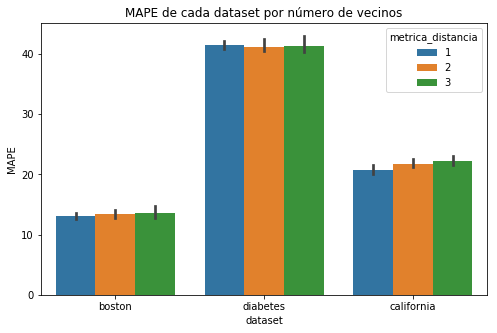

In [42]:
plt.figure(figsize=(8, 5))
sns.barplot(hue="metrica_distancia", y="MAPE", x="dataset", data= data_experim)
plt.title("MAPE de cada dataset por número de vecinos")
plt.show()

En el caso de la métrica de distancia, usamos la minkowski con parámetro p = {1, 2 y 3}
Esto implica la distancia manhatan, la euclídea y la raíz cúbica de las diferencias cúbicas.

Para los problemas de bostón y california se observó que el error crece con el crecimiento de p, por lo tanto sería más recomendable usar la distancia manhatan o p=1.

El dataset de diabetes indica que la mejor distancia sería la euclídea (p=2) pues el error aumenta con p=1 y p=3

### Ejercicio 5 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

#### Contexto

La métrica ROC AUC viene del acrónimo en inglés Receiver Operating Characteristic o característica operativa del receptor. 

Es una representación gráfica de la sensibilidad vs la especificidad de un clasificador **binario** según se varía el umbral de discriminación. 

<br>
<br>


**<p><small>tomado de wikipedia https://es.wikipedia.org/wiki/Curva_ROC.</small></p>**

#### ¿Y cómo lo calculo?
En palabras prácticas, un algoritmo de clasificación binaria te entregará probabilidades (números entre 0 y 1)

Partiendo de estas predicciones de probabilidad, lo que se hace es variar puntos de corte.
El punto de corte se utiliza para endurecer la predicción, es decir, para entregar sólo un 1 o un 0 al final.

Por ejemplo si el punto de corte es 0.5 (un punto de corte muy usual), diremos que todas las predicciones de probabilidad menores o iguales a 0.5 pertenecerán a la clase **0** y todas las que superen este umbral pertenecerán a la clase **1**

Lo que hace esta métrica es variar distintos puntos de corte (usualmente 200).  
Por ejemplo toma los puntos de corte en {0.01, 0.02, 0.03, ... , 0.99} y para cada uno de estos calcula cómo se vería la tasa de falsos positivos vs la tasa de verdaderos positivos. 

Luego se calcula el área que hay bajo esta curva, si el clasificador fuera perfecto esta área sería 1. 
Por lo tanto mientras más cercana a 1, mejor desempeño está mostrando el clasificador.

##### Ventajas
Esta métrica es insensible al balanceo de clases, proeblema que tiene por ejemplo la exactitud. 
Si por ejemplo en tus datos tienen 99% de data que pertenece a la clase 0 y solo un 1% pertenece a la clase 1, un clasificador no inteligente que entregue siempre 0, estaría acertando al 99% de la data. 

Pero la métrica de ROC AUC penaliza esto, pues este clasificador no está acertando nada de la clase 1.


#### Conclusión
Esta métrica evalúa, más que las probabilidades, el orden de las predicciones. Es decir evalúa que tu clasificador sí le dé más probabilidad a las instancias que pertenecen a la clase 1 que a las que pertenecen a la clase 0. 

Intente multiplicar las probabilidades por cualquier constante, y el roc será el mismo, pues como se mencionó, esta métrica más que evaluar la probabilidad, evalúa el orden.





<br>
<br>


<p><small>NOTA: Redacción propia de acuerdo a mi entendimiento de la métrica.</small></p>

#### Ejercicio práctico

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

Dado que esta métrica se usa principalmente para problemas de clasificación binaria, no se podría usar en primera instancia el dataset IRIS. 

Pero le haremos una modificación a este de forma que me queden 3 problemas binarios (por lo tanto 3 datasets)

#### Creación de los datasets

In [44]:
dataset_df = pd.DataFrame(iris_dict.data, columns=iris_dict.feature_names)
dataset_df["target_orig"] = iris_dict.target
dataset_df = dataset_df.sample(frac=1).reset_index(drop=True) # shuffle the dataset
dataset_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_orig
0,4.8,3.1,1.6,0.2,0
1,4.8,3.0,1.4,0.3,0
2,5.1,3.5,1.4,0.2,0
3,6.4,3.1,5.5,1.8,2
4,5.7,2.8,4.5,1.3,1


In [45]:
for target in range(3):
    dataset_df[f"target_{target}"] = (dataset_df["target_orig"] == target)+0
dataset_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_orig,target_0,target_1,target_2
0,4.8,3.1,1.6,0.2,0,1,0,0
1,4.8,3.0,1.4,0.3,0,1,0,0
2,5.1,3.5,1.4,0.2,0,1,0,0
3,6.4,3.1,5.5,1.8,2,0,0,1
4,5.7,2.8,4.5,1.3,1,0,1,0


Se ha creado un dataset donde tenemos 3 targets distintas (3 problemas de clasificación diferentes)
* target_0: esta variable vale 1 si el target pertenece a la clase 0, y vale 0 de otro modo
* target_1: esta variable vale 1 si el target pertenece a la clase 1, y vale 0 de otro modo
* target_2: esta variable vale 1 si el target pertenece a la clase 2, y vale 0 de otro modo

De esta manera contaré con 3 datasets distintos. Si bien las características son las mismas (sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)) como el target es distinto, son técnicamente datasets distintos y distintos problemas de clasificación

In [47]:
target_names = ["target_0", "target_1", "target_2"]
targets = {target_name: dataset_df[target_name] for target_name in target_names}

#### Ejemplo ilustrativo con hold-out [OPCIONAL]
En esta sección se realizará un ejercicio ilustrativo por medio de validación hold-out para visualizar el área bajo la curva roc.

Estimaremos el target_2 que es el dataset de Iris que es no linealmente separable. 

Se utilizará una regresión logística

In [77]:
# Splitting the dataset into the Training set and Val set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(dataset_df[iris_dict.feature_names], targets["target_1"], test_size = 0.4, random_state = 24)
print(X_train.shape)
print(X_val.shape)

(90, 4)
(60, 4)


In [78]:
# Entrenamiento del modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
y_train_pred = logreg.predict_proba(X_train)[:, 1]
y_val_pred = logreg.predict_proba(X_val)[:, 1]

print(classification_report(y_val, np.round(y_val_pred, 0)))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75        35
           1       0.71      0.20      0.31        25

    accuracy                           0.63        60
   macro avg       0.67      0.57      0.53        60
weighted avg       0.66      0.63      0.57        60



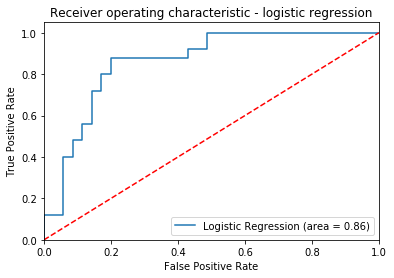

In [80]:
# Gráfica del roc_auc
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, y_val_pred)
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - logistic regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

El ejemplo anterior es meramente ilustrativo para mostrar la gráfica, pero técnicamente no es correcto hacer validación hold-out con tan pocos datos (apenas hay 150) porque el conjunto de test contendría muy pocos datos, siendo estadísticamente poco representativo.

Para un ejercicio que nos brinde más seguridad sobre la capacidad predictiva de estos algoritmos sobre el dataset iris, realizaremos un ejercicio con validación cruzada - leave one out

#### ejercicio leave one out

In [81]:
seed=42
algoritmos = {
    "logreg": LogisticRegression(solver='sag',max_iter=1000, random_state=seed),
    "cart": tree.DecisionTreeClassifier(random_state=seed)
}

In [82]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
              average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
              average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro'),
  'ROC_AUC':metrics.roc_auc_score
}


#### Ejecución de los experimentos

In [83]:
features = dataset_df[iris_dict.feature_names]
num_samples = features.shape[0]
num_samples

150

In [84]:
results_df = pd.DataFrame(columns=["dataset", "algorithm", "exactitud", "precision", "recall", "F1", "roc_auc"])
for target_name, y_target in targets.items():
    for alg_name, alg in algoritmos.items():
        
        # obtención de las predicciones
        y_pred = cross_val_predict(alg, features, y_target,
                   cv = KFold(n_splits=num_samples, random_state=seed))
        y_pred_proba = cross_val_predict(alg, features, y_target,
                   cv = KFold(n_splits=num_samples, random_state=seed), method="predict_proba")
        
        
        # Computando métricas
        exactitud = metricas['ACC'](y_target, y_pred)
        precicion = metricas['PREC'](y_target, y_pred)
        recall = metricas['RECALL'](y_target, y_pred)
        F1= metricas['F1'](y_target, y_pred)
        roc_auc= metricas['ROC_AUC'](y_target, y_pred_proba[:,1])
        
        
        # guardar los resultados en el dataframe correspondiente
        resultados_actuales = {
            "dataset":target_name,
            "algorithm": alg_name,
            "exactitud": exactitud,
            "precision": precicion,
            "recall":recall, 
            "F1":F1,
            "roc_auc": roc_auc
        }
        results_df = results_df.append(resultados_actuales, ignore_index=True)

        

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: Converg

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [85]:
results_df

,dataset,algorithm,exactitud,precision,recall,F1,roc_auc
0,target_0,logreg,1.000000,1.000000,1.000000,1.000000,1.0000
1,target_0,cart,1.000000,1.000000,1.000000,1.000000,1.0000
2,target_1,logreg,0.713333,0.713333,0.713333,0.713333,0.7944
3,target_1,cart,0.940000,0.940000,0.940000,0.940000,0.9350
4,target_2,logreg,0.973333,0.973333,0.973333,0.973333,0.9968
5,target_2,cart,0.946667,0.946667,0.946667,0.946667,0.9400


#### Comparación entre logreg y cart
En esta sección compararemos los resultados de la regresión logística versus árboles de decisión. 

exactitud


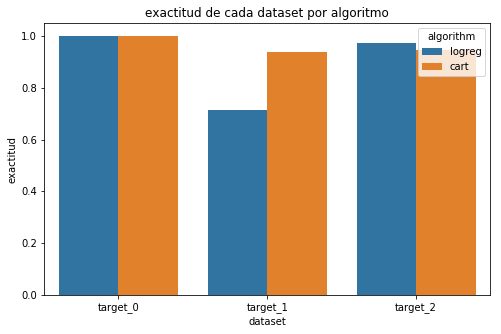

precision


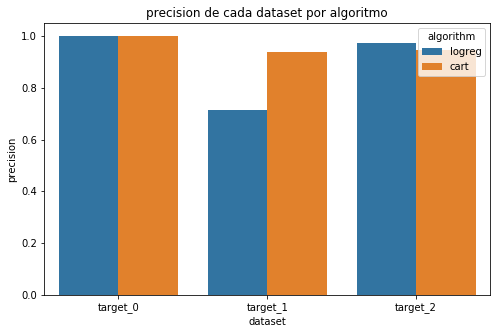

recall


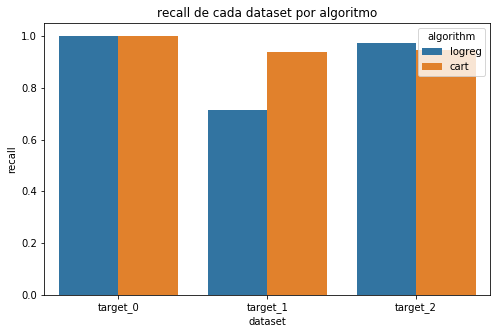

F1


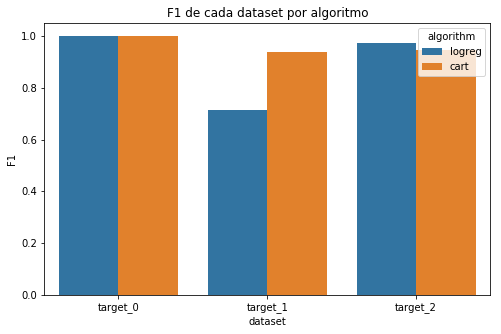

roc_auc


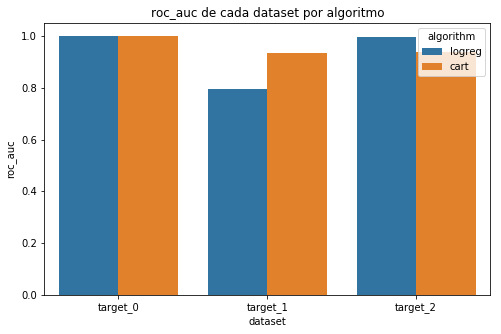

In [86]:
for metrica in ["exactitud", "precision", "recall", "F1", "roc_auc"]:
    print(metrica)
    plt.figure(figsize=(8, 5))
    sns.barplot(hue="algorithm", y=metrica, x="dataset", data= results_df)
    plt.title(f"{metrica} de cada dataset por algoritmo")
    plt.show()

Para TODAS las métricas se muestra el siguiente comportamiento:
* Para el target 0, todas las métricas son iguales ya sea por cart o por logreg
* Para el target 1, logreg siempre tiene un valor menor en cada métrica que cart
* Para el target 3, logreg siempre tiene un valor mayor en cada métrica que cart

Se puede observar también en la última gráfica, que el dataset con el target_1, es el que obtuvo un roc_auc (por ambos algoritmos) menor que los demás. Esto indica que el target 1 es el más difícil de clasificar, como se vio en clase. 
Esto debido a que el target_1 es una clase no linealmente separable de las otras 2.

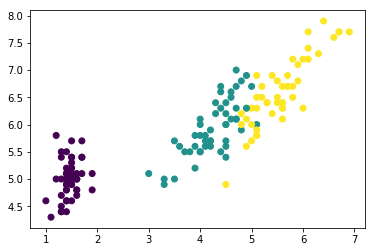

In [88]:
# gráfica de iris mostrando que el target_1 (segundo dataset) no es linealmente separable
plt.scatter(dataset_df["petal length (cm)"], dataset_df["sepal length (cm)"], c=dataset_df["target_orig"])
plt.show()

Nótese como se conoce que el target_0 es linealmente separable, el target_1 no lo es y el target_2, sí lo es pero se cruza con algunos puntos del target_1.

Así mismo se mostró en los resultados, pues los modelos con mejores resultados son los que estimaban el target_0. 

Luego, con muy buenos resultados, pero algunos errores, los modelos que estiman el target_2.

Y los modelos con el desempeño más bajo fueron los que trataron de estimar el target_1